# Experiment

- apply our prepared pipeline with validated exoplanet candidates
    - I use 4 methods: "biweight", "cosine", "GP_squared_exp" and "GP_periodic_auto"
        - for "biweight" and "cosine", window_length=3 * T_{dur} 
            - if T_{dur} is unknown, then window_length=0.3
        - for  "GP_squared_exp" and "GP_periodic_auto", initial kernel_size=1, and 100 times kernel_size optimization
- "df_target" is final result


In [1]:
%cd ..

/home/kobayashi/project/B4_research/src


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob
from wotan import t14
import warnings
warnings.simplefilter('ignore')

In [3]:
assert os.getcwd() == "/home/kobayashi/project/B4_research/src"

In [4]:
OUTPUT_DIR = "txt_file/"
def init_logger(file_name):
    log_file=OUTPUT_DIR+file_name
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

In [5]:
df_planets = pd.read_csv("dataframe/validated_candidate.csv", skiprows=119, )
df_tois = pd.read_csv("dataframe/TOIs.csv")

In [15]:
pd.set_option('display.max_columns', None)
df_planets

pl_name   hostname         tic_id  default_flag  sy_snum  sy_pnum  \
0   HIP 67522 b  HIP 67522  TIC 166527623             1        1        1   
1      AU Mic b     AU Mic  TIC 441420236             1        1        2   
2      AU Mic b     AU Mic  TIC 441420236             0        1        2   
3      AU Mic c     AU Mic  TIC 441420236             1        1        2   
4     TOI-837 b    TOI-837  TIC 460205581             1        1        1   
5    DS Tuc A b   DS Tuc A  TIC 410214986             0        2        1   
6    DS Tuc A b   DS Tuc A  TIC 410214986             1        2        1   
7     TOI-942 b    TOI-942  TIC 146520535             0        3        2   
8     TOI-942 c    TOI-942  TIC 146520535             0        3        2   
9     TOI-942 b    TOI-942  TIC 146520535             1        3        2   
10    TOI-942 c    TOI-942  TIC 146520535             1        3        2   
11    TOI-451 b    TOI-451  TIC 257605131             1        2        3   
12    TOI-451 c    TOI-451  TIC 257605131             1        2        3   
13    TOI-451 d    TOI-451  TIC 257605131             1        2        3   
14   TOI-1807 b   TOI-1807  TIC 180695581             1        1        1   
15    TOI-251 b    TOI-251  TIC 224225541             1        1        1   
16   TOI-2076 b   TOI-2076   TIC 27491137             1        1        3   
17   TOI-2076 c   TOI-2076   TIC 27491137             1        1        3   
18   TOI-2076 d   TOI-2076   TIC 27491137             1        1        3   
19  HD 110082 b  HD 110082  TIC 383390264             1        2        1   
20   TOI-1431 b   TOI-1431  TIC 375506058             1        1        1   
21   HD 63433 b   HD 63433  TIC 130181866             1        1        2   
22   HD 63433 c   HD 63433  TIC 130181866             1        1        2   
23  LP 791-18 b  LP 791-18  TIC 181804752             1        1        2   
24  LP 791-18 c  LP 791-18  TIC 181804752             1        1        2   
25    L 98-59 b    L 98-59  TIC 307210830             1        1        4   
26    L 98-59 c    L 98-59  TIC 307210830             1        1        4   
27    L 98-59 d    L 98-59  TIC 307210830             1        1        4   
28   TOI-1749 b   TOI-1749  TIC 233602827             1        1        3   
29   TOI-1749 c   TOI-1749  TIC 233602827             1        1        3   
30   TOI-1749 d   TOI-1749  TIC 233602827             1        1        3   
31    TOI-201 b    TOI-201  TIC 350618622             1        1        1   

   discoverymethod  disc_year                                 disc_facility  \
0          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
1          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
2          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
3          Transit       2021  Transiting Exoplanet Survey Satellite (TESS)   
4          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
5          Transit       2019  Transiting Exoplanet Survey Satellite (TESS)   
6          Transit       2019  Transiting Exoplanet Survey Satellite (TESS)   
7          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
8          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
9          Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
10         Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
11         Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
12         Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
13         Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
14         Transit       2021  Transiting Exoplanet Survey Satellite (TESS)   
15         Transit       2021  Transiting Exoplanet Survey Satellite (TESS)   
16         Transit       2021  Transiting Exoplanet Survey Satellite (TESS)   
17         Transit       2021  Transiting Ex

In [25]:
df_planets[["tic_id", "st_age", "pl_trandur", "pl_orbper", "pl_orbpererr1", "pl_orbpererr2", "st_rad"]]

tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  \
0   TIC 166527623   0.017     4.82200   6.959503       0.000016   
1   TIC 441420236   0.022     3.50000   8.463000       0.000002   
2   TIC 441420236   0.022     3.50000   8.463210       0.000040   
3   TIC 441420236   0.022     4.50000  18.859019       0.000016   
4   TIC 460205581   0.035     1.95700   8.324876       0.000016   
5   TIC 410214986   0.040         NaN   8.138700       0.000500   
6   TIC 410214986   0.045     3.17640   8.138268       0.000011   
7   TIC 146520535   0.050     2.76100   4.326300       0.001100   
8   TIC 146520535   0.050     3.72300  10.160500       0.005600   
9   TIC 146520535   0.090     3.40320   4.324190       0.000030   
10  TIC 146520535   0.090     1.91856  10.156430       0.000069   
11  TIC 257605131   0.120     2.03760   1.858703       0.000025   
12  TIC 257605131   0.120     3.55920   9.192522       0.000060   
13  TIC 257605131   0.120     4.09680  16.364988       0.000044   
14  TIC 180695581   0.180     0.97200   0.549372       0.000007   
15  TIC 224225541   0.180     2.23200   4.937770       0.000028   
16   TIC 27491137   0.204     3.32600  10.355660       0.000006   
17   TIC 27491137   0.204     4.21500        NaN            NaN   
18   TIC 27491137   0.204     3.20000        NaN            NaN   
19  TIC 383390264   0.250     2.91000  10.182710       0.000040   
20  TIC 375506058   0.290     2.48900   2.650237       0.000003   
21  TIC 130181866   0.414     3.21600   7.107930       0.000400   
22  TIC 130181866   0.414     4.06800  20.545300       0.001200   
23  TIC 181804752   0.500     0.61200   0.948005       0.000006   
24  TIC 181804752   0.500     1.20800   4.989963       0.000050   
25  TIC 307210830   0.800     0.99200   2.253114       0.000001   
26  TIC 307210830   0.800     1.34600   3.690678       0.000002   
27  TIC 307210830   0.800     0.84000   7.450724       0.000008   
28  TIC 233602827   0.800         NaN   2.388390       0.000310   
29  TIC 233602827   0.800         NaN   4.492900       0.003800   
30  TIC 233602827   0.800         NaN   9.049700       0.004900   
31  TIC 350618622   0.870         NaN  52.978180       0.000040   

    pl_orbpererr2  st_rad  
0       -0.000015    1.38  
1       -0.000002    0.75  
2       -0.000040    0.75  
3       -0.000016    0.75  
4       -0.000016    1.02  
5       -0.000500    0.87  
6       -0.000011    0.96  
7       -0.001100    0.89  
8       -0.005300    0.89  
9       -0.000030    1.02  
10      -0.000079    1.02  
11      -0.000035    0.88  
12      -0.000100    0.88  
13      -0.000044    0.88  
14      -0.000007    0.68  
15      -0.000029    0.88  
16      -0.000006    0.76  
17            NaN    0.76  
18            NaN    0.76  
19      -0.000040    1.19  
20      -0.000003    1.92  
21      -0.000340    0.91  
22      -0.001300    0.91  
23      -0.000006    0.17  
24      -0.000050    0.17  
25      -0.000002    0.30  
26      -0.000003    0.30  
27      -0.000005    0.30  
28      -0.000660    0.55  
29      -0.002700    0.55  
30      -0.003200    0.55  
31      -0.000040    1.32

In [39]:
from astropy.constants import G
from astropy import constants as const 

df_log_cand = df_planets[["tic_id", "st_age", "pl_trandur", "pl_orbper", "pl_orbpererr1", "pl_orbpererr2", "st_rad", "st_mass"]]
df_log_cand = df_log_cand.dropna(subset=['pl_orbper']).drop_duplicates(subset='tic_id').reset_index()
df_log_cand = df_log_cand[df_log_cand["pl_orbper"] <= 14]
for idx, row in df_log_cand.iterrows():
    Rs = row["st_rad"]
    Ms = row["st_mass"]
    P = row["pl_orbper"]
    T14 = Rs * u.R_sun * pow(4 * P * u.day / (np.pi * const.G * Ms * u.M_sun), 1/3)
    df_log_cand.loc[idx, "theoritical_pl_trandur"] = T14.to(u.hour).value
    
df_log_cand#[["tic_id", "pl_trandur", "theoritical_pl_trandur"]]

index         tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  \
0       0  TIC 166527623   0.017      4.8220   6.959503       0.000016   
1       1  TIC 441420236   0.022      3.5000   8.463000       0.000002   
2       4  TIC 460205581   0.035      1.9570   8.324876       0.000016   
3       5  TIC 410214986   0.040         NaN   8.138700       0.000500   
4       7  TIC 146520535   0.050      2.7610   4.326300       0.001100   
5      11  TIC 257605131   0.120      2.0376   1.858703       0.000025   
6      14  TIC 180695581   0.180      0.9720   0.549372       0.000007   
7      15  TIC 224225541   0.180      2.2320   4.937770       0.000028   
8      16   TIC 27491137   0.204      3.3260  10.355660       0.000006   
9      19  TIC 383390264   0.250      2.9100  10.182710       0.000040   
10     20  TIC 375506058   0.290      2.4890   2.650237       0.000003   
11     21  TIC 130181866   0.414      3.2160   7.107930       0.000400   
12     23  TIC 181804752   0.500      0.6120   0.948005       0.000006   
13     25  TIC 307210830   0.800      0.9920   2.253114       0.000001   
14     28  TIC 233602827   0.800         NaN   2.388390       0.000310   

    pl_orbpererr2  st_rad  st_mass  theoritical_pl_trandur  
0       -0.000015    1.38     1.22                4.476193  
1       -0.000002    0.75     0.50                3.495717  
2       -0.000016    1.02     1.12                3.613630  
3       -0.000500    0.87     0.96                3.220358  
4       -0.001100    0.89     0.88                2.747208  
5       -0.000035    0.88     0.95                1.998029  
6       -0.000007    0.68     0.75                1.112758  
7       -0.000029    0.88     1.04                2.684966  
8       -0.000006    0.76     0.85                3.174608  
9       -0.000040    1.19     1.21                4.394032  
10      -0.000003    1.92     1.90                3.894352  
11      -0.000340    0.91     0.99                3.186894  
12      -0.000006    0.17     0.14                0.583848  
13      -0.000002    0.30     0.27                1.104633  
14      -0.000660    0.55     0.58                1.600339

In [20]:
LOGGER = init_logger('1st_iter_biweight.batch')
LOGGER.info("#This txt file run wotan and tls on validated candidates.")
for idx, row in df_log_cand[["tic_id", "st_age", "pl_trandur"]].iterrows():
    TIC = row["tic_id"].split()[-1]
    t_dur = 0.1
    LOGGER.info(f"python run_1st_biweight.py --TIC {TIC} --window_length {3*t_dur} --experiment_name validated_candidates --method biweight --tag {idx}")


#This txt file run wotan and tls on validated candidates.
#This txt file run wotan and tls on validated candidates.
#This txt file run wotan and tls on validated candidates.
#This txt file run wotan and tls on validated candidates.
python run_1st_biweight.py --TIC 166527623 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 0
python run_1st_biweight.py --TIC 166527623 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 0
python run_1st_biweight.py --TIC 166527623 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 0
python run_1st_biweight.py --TIC 166527623 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 0
python run_1st_biweight.py --TIC 441420236 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 1
python run_1st_biweight.py --TIC 441420236 --win

python run_1st_biweight.py --TIC 233602827 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 14
python run_1st_biweight.py --TIC 233602827 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 14
python run_1st_biweight.py --TIC 233602827 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 14
python run_1st_biweight.py --TIC 233602827 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 14


In [6]:
LOGGER = init_logger('validated_biweight.batch')
LOGGER.info("#This txt file execute wotan and tls on validated candidates.")
for idx, row in df_planets[["tic_id", "st_age", "pl_trandur"]].iterrows():
    TIC = row["tic_id"].split()[-1]
    t_dur = 0.1 if math.isnan(row["pl_trandur"]) else row["pl_trandur"]/24
    LOGGER.info(f"python execute_wotan_gls.py --TIC {TIC} --window_length {3*t_dur} --experiment_name validated_candidates --method biweight --tag {idx}")


#This txt file execute wotan and tls on validated candidates.
python execute_wotan_gls.py --TIC 166527623 --window_length 0.60275 --experiment_name validated_candidates --method biweight --tag 0
python execute_wotan_gls.py --TIC 441420236 --window_length 0.4375 --experiment_name validated_candidates --method biweight --tag 1
python execute_wotan_gls.py --TIC 441420236 --window_length 0.4375 --experiment_name validated_candidates --method biweight --tag 2
python execute_wotan_gls.py --TIC 441420236 --window_length 0.5625 --experiment_name validated_candidates --method biweight --tag 3
python execute_wotan_gls.py --TIC 460205581 --window_length 0.24462499999999998 --experiment_name validated_candidates --method biweight --tag 4
python execute_wotan_gls.py --TIC 410214986 --window_length 0.30000000000000004 --experiment_name validated_candidates --method biweight --tag 5
python execute_wotan_gls.py --TIC 410214986 --window_length 0.39705 --experiment_name validated_candidates --method biw

In [7]:
LOGGER = init_logger('validated_cosine.batch')
LOGGER.info("#This txt file execute wotan and tls on validated candidates.")
for idx, row in df_planets[["tic_id", "st_age", "pl_trandur"]].iterrows():
    TIC = row["tic_id"].split()[-1]
    t_dur = 0.1 if math.isnan(row["pl_trandur"]) else row["pl_trandur"]/24
    LOGGER.info(f"python execute_wotan_gls.py --TIC {TIC} --window_length {3*t_dur} --experiment_name validated_candidates --method cosine --tag {idx}")


#This txt file execute wotan and tls on validated candidates.
#This txt file execute wotan and tls on validated candidates.
python execute_wotan_gls.py --TIC 166527623 --window_length 0.60275 --experiment_name validated_candidates --method cosine --tag 0
python execute_wotan_gls.py --TIC 166527623 --window_length 0.60275 --experiment_name validated_candidates --method cosine --tag 0
python execute_wotan_gls.py --TIC 441420236 --window_length 0.4375 --experiment_name validated_candidates --method cosine --tag 1
python execute_wotan_gls.py --TIC 441420236 --window_length 0.4375 --experiment_name validated_candidates --method cosine --tag 1
python execute_wotan_gls.py --TIC 441420236 --window_length 0.4375 --experiment_name validated_candidates --method cosine --tag 2
python execute_wotan_gls.py --TIC 441420236 --window_length 0.4375 --experiment_name validated_candidates --method cosine --tag 2
python execute_wotan_gls.py --TIC 441420236 --window_length 0.5625 --experiment_name validated

python execute_wotan_gls.py --TIC 233602827 --window_length 0.30000000000000004 --experiment_name validated_candidates --method cosine --tag 30
python execute_wotan_gls.py --TIC 350618622 --window_length 0.30000000000000004 --experiment_name validated_candidates --method cosine --tag 31
python execute_wotan_gls.py --TIC 350618622 --window_length 0.30000000000000004 --experiment_name validated_candidates --method cosine --tag 31


In [7]:
LOGGER = init_logger('validated_gp_rbf.batch')
LOGGER.info("#This txt file execute wotan and tls on validated candidates.")
for idx, row in df_planets[["tic_id", "st_age", "pl_trandur"]].iterrows():
    TIC = row["tic_id"].split()[-1]
    t_dur = 0.1 if math.isnan(row["pl_trandur"]) else row["pl_trandur"]/24
    LOGGER.info(f"python execute_wotan_gls.py --TIC {TIC} --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag {idx}")

#This txt file execute wotan and tls on validated candidates.
#This txt file execute wotan and tls on validated candidates.
python execute_wotan_gls.py --TIC 166527623 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 0
python execute_wotan_gls.py --TIC 166527623 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 0
python execute_wotan_gls.py --TIC 441420236 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 1
python execute_wotan_gls.py --TIC 441420236 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 1
python execute_wotan_gls.py --TIC 441420236 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 2
python execute_wotan_gls.py --TIC 441420236 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 2
python execute_wotan_gls.py --TIC 44

python execute_wotan_gls.py --TIC 233602827 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 29
python execute_wotan_gls.py --TIC 233602827 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 29
python execute_wotan_gls.py --TIC 233602827 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 30
python execute_wotan_gls.py --TIC 233602827 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 30
python execute_wotan_gls.py --TIC 350618622 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 31
python execute_wotan_gls.py --TIC 350618622 --experiment_name validated_candidates --method gp --kernel squared_exp --kernel_size 1 --tag 31


## Extract and Analyze SDE 

In [107]:
df_target = df_planets[["tic_id", "st_age", "pl_trandur", "pl_orbper", "pl_orbpererr1", "pl_orbpererr2"]]
ll = []
for image_path in glob.glob(f"{tls_img_path}/*biweight*"):
    planet_id = int(image_path.split("/")[-1].split("_")[-1].split(".")[0])
    sector =  str(image_path.split("/")[-1].split("_")[1][-2:])
    df_target.loc[planet_id, "sector"] = sector
    ll.append([planet_id, sector])

ll = sorted(ll, key=lambda x: x[0])

sectors = [str(x[1]) for x in ll]
df_target["sector"] = sectors

/home/kobayashi/miniconda3/envs/py3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/kobayashi/miniconda3/envs/py3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_252213/1455055461.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [108]:
tls_img_path = "../output/validated_candidates/tls_images/"
methods = ["biweight", "cosine", "GP_squared_exp", "GP_periodic_auto"]

for idx, row in df_target.iterrows():
    tic = row['tic_id'].replace(' ', '')
    sector = str(row['sector'])
    for method in methods:
        img_name = f'{tic}_SECTOR{sector}_Method_{method}__{idx}.png'
        img_path = os.path.join(tls_img_path, img_name)

        if os.path.exists(img_path):
            df_target.loc[idx, method] = int(1)

        else:
            df_target.loc[idx, method] = int(0)

In [110]:
df_target.head()

tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  pl_orbpererr2  \
0  TIC 166527623   0.017       4.822   6.959503       0.000016      -0.000015   
1  TIC 441420236   0.022       3.500   8.463000       0.000002      -0.000002   
2  TIC 441420236   0.022       3.500   8.463210       0.000040      -0.000040   
3  TIC 441420236   0.022       4.500  18.859019       0.000016      -0.000016   
4  TIC 460205581   0.035       1.957   8.324876       0.000016      -0.000016   

  sector  biweight  cosine  GP_squared_exp  GP_periodic_auto  
0     11       1.0     1.0             1.0               1.0  
1     01       1.0     1.0             1.0               1.0  
2     01       1.0     1.0             1.0               1.0  
3     01       1.0     1.0             1.0               1.0  
4     10       1.0     1.0             1.0               1.0

Text(0, 0.5, 'count')

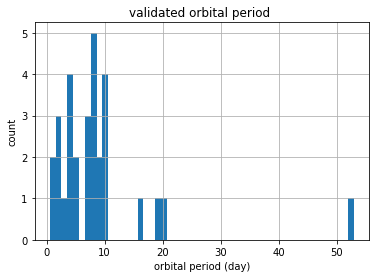

In [201]:
plt.title("validated orbital period ")
plt.hist(df_target["pl_orbper"], bins=52)
plt.grid(True)
plt.xlabel("orbital period (day)")
plt.ylabel("count")

In [109]:
for method in methods:
    print(f"number of images of {method}:", int(df_target[method].sum()))

number of images of biweight: 32
number of images of cosine: 28
number of images of GP_squared_exp: 27
number of images of GP_periodic_auto: 32


In [136]:
#extract SDE values from hdf5 files.
import deepdish as dd
methods = ["biweight", "cosine", "gp_Kernel_squared_exp", "gp_Kernel_periodic_auto"]

for idx, row in df_target.iterrows():
    tic = row['tic_id'].replace(' ', '')
    sector = str(row['sector'])
    pl_orb = float(row["pl_orbper"])
    pl_orb_upper = pl_orb + 2000 * row["pl_orbpererr1"]
    pl_orb_lower = pl_orb + 2000 * row["pl_orbpererr2"] #Note :  df_target["pl_orbpererr2"]  are negative
    
    if math.isnan(pl_orb):
        continue
        
    for method in methods:
        h5_file = f"../output/validated_candidates/tls_hdf5/{tic}_SECTOR{sector}_Method_{method}_{idx}.h5"

        try:
            h5d = dd.io.load(h5_file)

            power_list = h5d["power"]
            periods_list = h5d["periods"]

            mask = (periods_list > pl_orb_lower) & (periods_list < pl_orb_upper)
            SDE = max(power_list[mask])
            df_target.loc[idx, f"{method}_SDE"] = SDE
        except:
            pass

/home/kobayashi/miniconda3/envs/py3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [137]:
df_target

tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  \
0   TIC 166527623   0.017     4.82200   6.959503       0.000016   
1   TIC 441420236   0.022     3.50000   8.463000       0.000002   
2   TIC 441420236   0.022     3.50000   8.463210       0.000040   
3   TIC 441420236   0.022     4.50000  18.859019       0.000016   
4   TIC 460205581   0.035     1.95700   8.324876       0.000016   
5   TIC 410214986   0.040         NaN   8.138700       0.000500   
6   TIC 410214986   0.045     3.17640   8.138268       0.000011   
7   TIC 146520535   0.050     2.76100   4.326300       0.001100   
8   TIC 146520535   0.050     3.72300  10.160500       0.005600   
9   TIC 146520535   0.090     3.40320   4.324190       0.000030   
10  TIC 146520535   0.090     1.91856  10.156430       0.000069   
11  TIC 257605131   0.120     2.03760   1.858703       0.000025   
12  TIC 257605131   0.120     3.55920   9.192522       0.000060   
13  TIC 257605131   0.120     4.09680  16.364988       0.000044   
14  TIC 180695581   0.180     0.97200   0.549372       0.000007   
15  TIC 224225541   0.180     2.23200   4.937770       0.000028   
16   TIC 27491137   0.204     3.32600  10.355660       0.000006   
17   TIC 27491137   0.204     4.21500        NaN            NaN   
18   TIC 27491137   0.204     3.20000        NaN            NaN   
19  TIC 383390264   0.250     2.91000  10.182710       0.000040   
20  TIC 375506058   0.290     2.48900   2.650237       0.000003   
21  TIC 130181866   0.414     3.21600   7.107930       0.000400   
22  TIC 130181866   0.414     4.06800  20.545300       0.001200   
23  TIC 181804752   0.500     0.61200   0.948005       0.000006   
24  TIC 181804752   0.500     1.20800   4.989963       0.000050   
25  TIC 307210830   0.800     0.99200   2.253114       0.000001   
26  TIC 307210830   0.800     1.34600   3.690678       0.000002   
27  TIC 307210830   0.800     0.84000   7.450724       0.000008   
28  TIC 233602827   0.800         NaN   2.388390       0.000310   
29  TIC 233602827   0.800         NaN   4.492900       0.003800   
30  TIC 233602827   0.800         NaN   9.049700       0.004900   
31  TIC 350618622   0.870         NaN  52.978180       0.000040   

    pl_orbpererr2 sector  biweight  cosine  GP_squared_exp  GP_periodic_auto  \
0       -0.000015     11       1.0     1.0             1.0               1.0   
1       -0.000002     01       1.0     1.0             1.0               1.0   
2       -0.000040     01       1.0     1.0             1.0               1.0   
3       -0.000016     01       1.0     1.0             1.0               1.0   
4       -0.000016     10       1.0     1.0             1.0               1.0   
5       -0.000500     01       1.0     1.0             1.0               1.0   
6       -0.000011     01       1.0     1.0             1.0               1.0   
7       -0.001100     32       1.0     1.0             1.0               1.0   
8       -0.005300     32       1.0     1.0             1.0               1.0   
9       -0.000030     32       1.0     1.0             1.0               1.0   
10      -0.000079     32       1.0     1.0             1.0               1.0   
11      -0.000035     04       1.0     1.0             1.0               1.0   
12      -0.000100     04       1.0     1.0             1.0               1.0   
13      -0.000044     04       1.0     1.0             1.0               1.0   
14      -0.000007     22       1.0     1.0             1.0               1.0   
15      -0.000029     02       1.0     1.0             1.0               1.0   
16      -0.000006     16       1.0     1.0             1.0               1.0   
17            NaN     16       1.0     1.0             1.0               1.0   
18            NaN     16       1.0     1.0             1.0               1.0   
19      -0.000040     12       1.0     1.0             0.0               1.0   
20      -0.000003     15       1.0     1.0             1.0               1.0   
21      -0.000340     20       1.0     

In [138]:
df_target.to_csv("../output/validated_candidates/SDE_result.csv")

### Plot Difference

In [5]:
df_target = pd.read_csv("../output/validated_candidates/SDE_result.csv")
df_target.head()

Unnamed: 0         tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  \
0           0  TIC 166527623   0.017       4.822   6.959503       0.000016   
1           1  TIC 441420236   0.022       3.500   8.463000       0.000002   
2           2  TIC 441420236   0.022       3.500   8.463210       0.000040   
3           3  TIC 441420236   0.022       4.500  18.859019       0.000016   
4           4  TIC 460205581   0.035       1.957   8.324876       0.000016   

   pl_orbpererr2  sector  biweight  cosine  GP_squared_exp  GP_periodic_auto  \
0      -0.000015      11       1.0     1.0             1.0               1.0   
1      -0.000002       1       1.0     1.0             1.0               1.0   
2      -0.000040       1       1.0     1.0             1.0               1.0   
3      -0.000016       1       1.0     1.0             1.0               1.0   
4      -0.000016      10       1.0     1.0             1.0               1.0   

   biweight_SDE  cosine_SDE  GP_squared_exp_SDE  GP_periodic_auto_SDE  
0      0.261192    0.496282           13.567166              6.478711  
1     -0.157121    0.959043            0.143198              2.148295  
2     -0.157121    1.692827            0.155655              4.532986  
3           NaN         NaN                 NaN                   NaN  
4     -0.007587    7.794174           12.442459             -0.264407

In [53]:
def sde_comparison(method1, method2):
    idx = (df_target[method1]==1) & (df_target[method2]==1) 
    df_temp = df_target.loc[idx, [f"{method1}_SDE", f"{method2}_SDE"]].dropna()

    all_diff = []
    for _, row in df_temp.iterrows():
        cur_diff = []
        SDE_1 = row[f"{method1}_SDE"]
        SDE_2 = row[f"{method2}_SDE"]

        cur_diff.append(float(SDE_1 - SDE_2))
        all_diff.append(cur_diff)
    cnt_1 = sum([1 if x[0]<0 else 0 for x in all_diff ])
    cnt_2 = len(all_diff) - cnt_1
    plt.figure(figsize=(6, 4))
    plt.hist(all_diff, label=f"{method1}: {cnt_1}\n{method2}: {cnt_2}")
    plt.legend()
    plt.title(f"SDE Comparison: {method1} vs {method2}", fontsize=21)
    plt.xlabel(f"diff ({method1}_SDE - {method2}_SDE)", fontsize=18)
    plt.ylabel("count", fontsize=18)

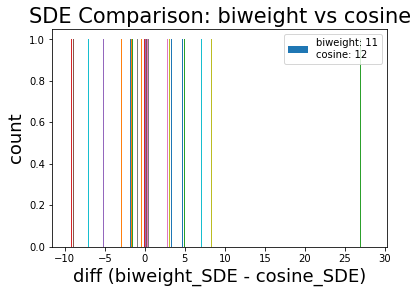

In [54]:
sde_comparison("biweight", "cosine")

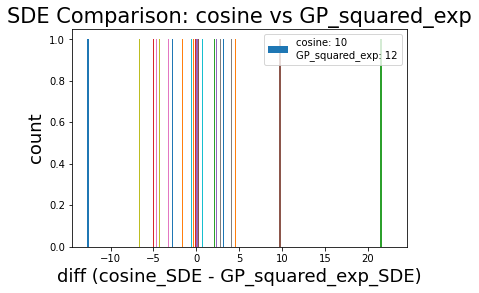

In [55]:
sde_comparison("cosine", "GP_squared_exp")

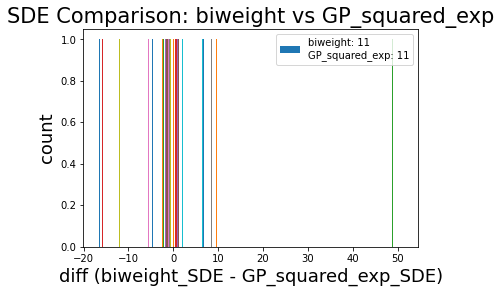

In [56]:
sde_comparison("biweight", "GP_squared_exp")

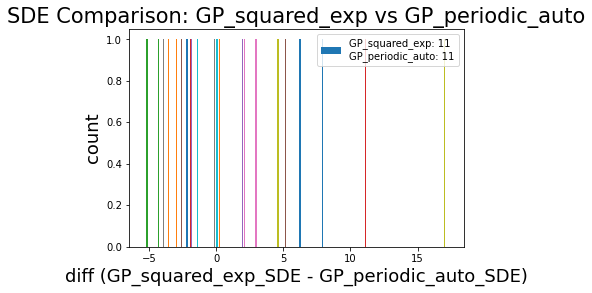

In [57]:
sde_comparison("GP_squared_exp", "GP_periodic_auto")

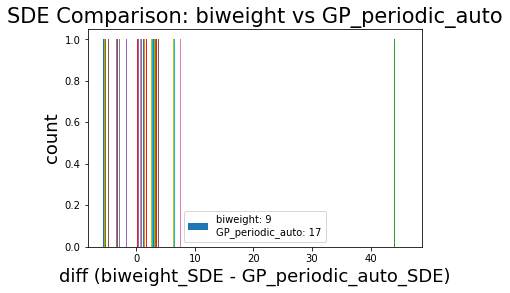

In [58]:
sde_comparison("biweight", "GP_periodic_auto")

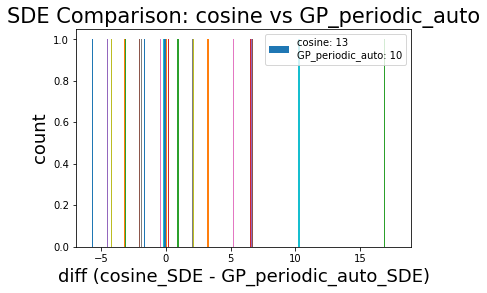

In [59]:
sde_comparison("cosine", "GP_periodic_auto")

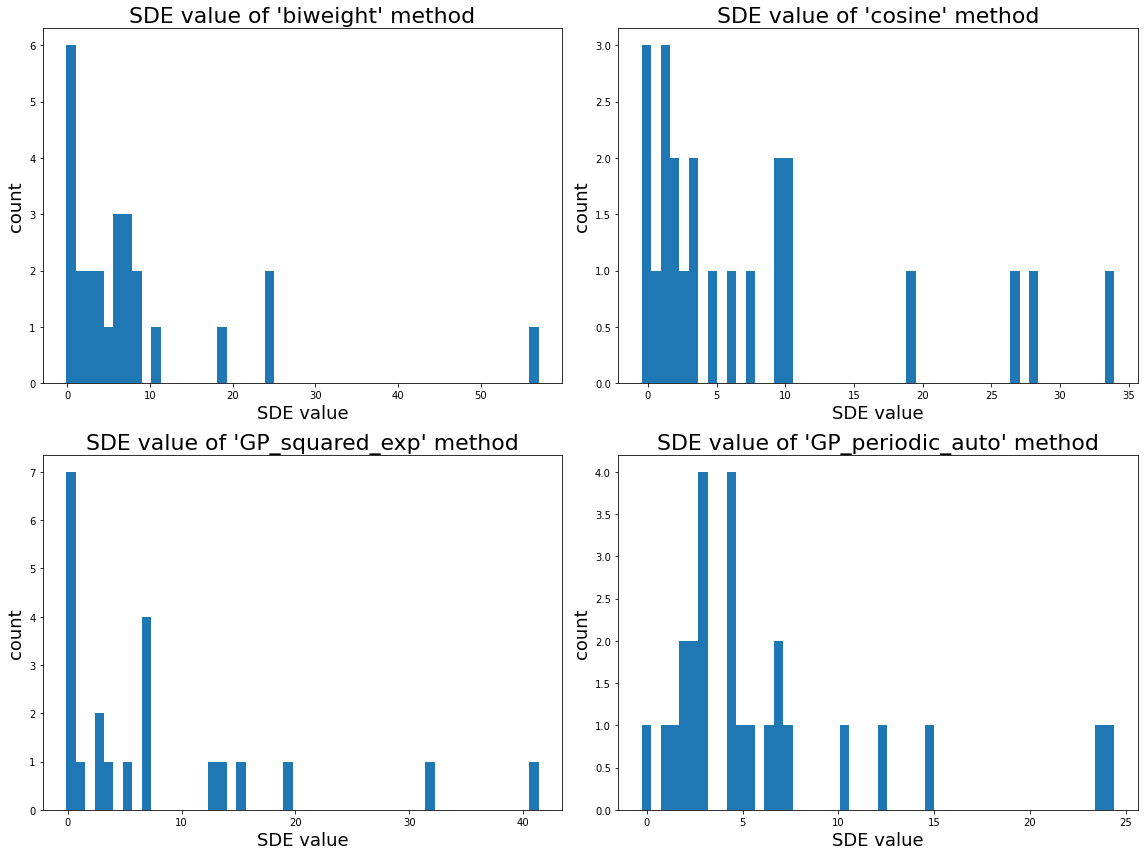

In [216]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
methods = [["biweight", "cosine"], ["GP_squared_exp", "GP_periodic_auto"]]
for i in range(2):
    for j in range(2):
        axes[i][j].set_title(f"SDE value of '{methods[i][j]}' method", fontsize=22)
        axes[i][j].hist(df_target[f"{methods[i][j]}_SDE"], bins=50)
        axes[i][j].set_xlabel("SDE value", fontsize=18)
        axes[i][j].set_ylabel("count", fontsize=18)
        
plt.tight_layout() 
plt.show()

In [61]:
df_target.dropna(axis=0).drop_duplicates(subset='tic_id')

Unnamed: 0         tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  \
0            0  TIC 166527623   0.017      4.8220   6.959503       0.000016   
1            1  TIC 441420236   0.022      3.5000   8.463000       0.000002   
4            4  TIC 460205581   0.035      1.9570   8.324876       0.000016   
6            6  TIC 410214986   0.045      3.1764   8.138268       0.000011   
7            7  TIC 146520535   0.050      2.7610   4.326300       0.001100   
11          11  TIC 257605131   0.120      2.0376   1.858703       0.000025   
14          14  TIC 180695581   0.180      0.9720   0.549372       0.000007   
15          15  TIC 224225541   0.180      2.2320   4.937770       0.000028   
16          16   TIC 27491137   0.204      3.3260  10.355660       0.000006   
20          20  TIC 375506058   0.290      2.4890   2.650237       0.000003   
21          21  TIC 130181866   0.414      3.2160   7.107930       0.000400   
23          23  TIC 181804752   0.500      0.6120   0.948005       0.000006   
25          25  TIC 307210830   0.800      0.9920   2.253114       0.000001   

    pl_orbpererr2  sector  biweight  cosine  GP_squared_exp  GP_periodic_auto  \
0       -0.000015      11       1.0     1.0             1.0               1.0   
1       -0.000002       1       1.0     1.0             1.0               1.0   
4       -0.000016      10       1.0     1.0             1.0               1.0   
6       -0.000011       1       1.0     1.0             1.0               1.0   
7       -0.001100      32       1.0     1.0             1.0               1.0   
11      -0.000035       4       1.0     1.0             1.0               1.0   
14      -0.000007      22       1.0     1.0             1.0               1.0   
15      -0.000029       2       1.0     1.0             1.0               1.0   
16      -0.000006      16       1.0     1.0             1.0               1.0   
20      -0.000003      15       1.0     1.0             1.0               1.0   
21      -0.000340      20       1.0     1.0             1.0               1.0   
23      -0.000006       9       1.0     1.0             1.0               1.0   
25      -0.000002       2       1.0     1.0             1.0               1.0   

    biweight_SDE  cosine_SDE  GP_squared_exp_SDE  GP_periodic_auto_SDE  
0       0.261192    0.496282           13.567166              6.478711  
1      -0.157121    0.959043            0.143198              2.148295  
4      -0.007587    7.794174           12.442459             -0.264407  
6       0.288043   10.356623           -0.115326              3.165243  
7       6.838097    4.361567            6.659705              4.652996  
11      3.499807    1.901606           -0.144763              2.770414  
14     57.008771   28.255995            5.106215             10.253363  
15      1.196756    0.956299           -0.053779              1.106863  
16      1.105433   -0.459849            1.391037              4.441547  
20     18.960543   18.920922           19.153742             14.541479  
21      8.316054   10.534165           15.256511             12.411599  
23      7.559264    1.519257           -0.044900              5.570505  
25      2.745356   -0.048613           -0.071805              2.527297

In [63]:
df_target

Unnamed: 0         tic_id  st_age  pl_trandur  pl_orbper  pl_orbpererr1  \
0            0  TIC 166527623   0.017     4.82200   6.959503       0.000016   
1            1  TIC 441420236   0.022     3.50000   8.463000       0.000002   
2            2  TIC 441420236   0.022     3.50000   8.463210       0.000040   
3            3  TIC 441420236   0.022     4.50000  18.859019       0.000016   
4            4  TIC 460205581   0.035     1.95700   8.324876       0.000016   
5            5  TIC 410214986   0.040         NaN   8.138700       0.000500   
6            6  TIC 410214986   0.045     3.17640   8.138268       0.000011   
7            7  TIC 146520535   0.050     2.76100   4.326300       0.001100   
8            8  TIC 146520535   0.050     3.72300  10.160500       0.005600   
9            9  TIC 146520535   0.090     3.40320   4.324190       0.000030   
10          10  TIC 146520535   0.090     1.91856  10.156430       0.000069   
11          11  TIC 257605131   0.120     2.03760   1.858703       0.000025   
12          12  TIC 257605131   0.120     3.55920   9.192522       0.000060   
13          13  TIC 257605131   0.120     4.09680  16.364988       0.000044   
14          14  TIC 180695581   0.180     0.97200   0.549372       0.000007   
15          15  TIC 224225541   0.180     2.23200   4.937770       0.000028   
16          16   TIC 27491137   0.204     3.32600  10.355660       0.000006   
17          17   TIC 27491137   0.204     4.21500        NaN            NaN   
18          18   TIC 27491137   0.204     3.20000        NaN            NaN   
19          19  TIC 383390264   0.250     2.91000  10.182710       0.000040   
20          20  TIC 375506058   0.290     2.48900   2.650237       0.000003   
21          21  TIC 130181866   0.414     3.21600   7.107930       0.000400   
22          22  TIC 130181866   0.414     4.06800  20.545300       0.001200   
23          23  TIC 181804752   0.500     0.61200   0.948005       0.000006   
24          24  TIC 181804752   0.500     1.20800   4.989963       0.000050   
25          25  TIC 307210830   0.800     0.99200   2.253114       0.000001   
26          26  TIC 307210830   0.800     1.34600   3.690678       0.000002   
27          27  TIC 307210830   0.800     0.84000   7.450724       0.000008   
28          28  TIC 233602827   0.800         NaN   2.388390       0.000310   
29          29  TIC 233602827   0.800         NaN   4.492900       0.003800   
30          30  TIC 233602827   0.800         NaN   9.049700       0.004900   
31          31  TIC 350618622   0.870         NaN  52.978180       0.000040   

    pl_orbpererr2  sector  biweight  cosine  GP_squared_exp  GP_periodic_auto  \
0       -0.000015      11       1.0     1.0             1.0               1.0   
1       -0.000002       1       1.0     1.0             1.0               1.0   
2       -0.000040       1       1.0     1.0             1.0               1.0   
3       -0.000016       1       1.0     1.0             1.0               1.0   
4       -0.000016      10       1.0     1.0             1.0               1.0   
5       -0.000500       1       1.0     1.0             1.0               1.0   
6       -0.000011       1       1.0     1.0             1.0               1.0   
7       -0.001100      32       1.0     1.0             1.0               1.0   
8       -0.005300      32       1.0     1.0             1.0               1.0   
9       -0.000030      32       1.0     1.0             1.0               1.0   
10      -0.000079      32       1.0     1.0             1.0               1.0   
11      -0.000035       4       1.0     1.0             1.0               1.0   
12      -0.000100       4       1.0     1.0             1.0               1.0   
13      -0.000044       4       1.0     1.0             1.0               1.0   
14      -0.000007      22       1.0     1.0             1.0               1.0   
15      -0.000029       2       1.0     1.0             1.0               1.0   
16      -0.000006  